# Analysis of the Vaccinations Statistics of 5 Major Countries in last 90 Days
# (10 May, 2021 to 7 August, 2021)

## -> The Countries are:
   ### 1. China
   ### 2. India
   ### 3. United Kingdom
   ### 4. United States
   ### 5. Russia

In [5]:
import Pkg

Pkg.add("Distributions")
Pkg.add("StatsPlots")
Pkg.add("HypothesisTests")
Pkg.add("GLM")
Pkg.add("ORCA")
Pkg.add("Plots")
Pkg.add("DataFrames")

    Updating registry at `C:\Users\User\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\User\.julia\environments\v1.7\Project.toml`
  No Changes to `C:\Users\User\.julia\environments\v1.7\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users

In [6]:
using Distributions
using DataFrames
using StatsPlots
using HypothesisTests
using GLM 
using ORCA
using Plots

┌ Warning: Kaledio is not available on this system. Julia will be unable to produce any plots.
└ @ PlotlyBase C:\Users\User\.julia\packages\PlotlyBase\NxSlF\src\kaleido.jl:58
┌ Warning: ORCA.jl has been deprecated and all savefig functionality
│ has been implemented directly in PlotlyBase itself.
│ 
│ By implementing in PlotlyBase.jl, the savefig routines are automatically
│ available to PlotlyJS.jl also.
└ @ ORCA C:\Users\User\.julia\packages\ORCA\U5XaN\src\ORCA.jl:8


In [8]:
using DelimitedFiles
vac = DelimitedFiles.readdlm("Vacc2.csv", ',')

using Dates
col1 = vac[:, 1]
for i = 1:length(col1)
    col1[i] = Dates.DateTime(col1[i], "d-u-y")  # note that this replaces the previous value in col1[i]
end

days_passed(x) = Dates.datetime2rata(x) - Dates.datetime2rata(col1[1])
vacdays = Array{Int64}(undef,90)
for i = 1:length(col1)
    vacdays[i] = days_passed(col1[i])
end
vac[:,1]=vacdays

DelimitedFiles.writedlm("Vacc_converted.csv", vac, ',')


using DelimitedFiles
vac = DelimitedFiles.readdlm("Vacc_converted.csv", ',') 

chn,ind,uk,us,rus=vac[:,3],vac[:,5],vac[:,7],vac[:,9],vac[:,11]
vac_cum=vac
vac_cum[:,3]=cumsum(chn)
vac_cum[:,5]=cumsum(ind)
vac_cum[:,7]=cumsum(uk)
vac_cum[:,9]=cumsum(us)
vac_cum[:,11]=cumsum(rus)

total_vac=vac_cum[:,3:2:11]
total_vac = convert.(Int, vac_cum[:, [3,5,7,9,11]])

using Plots
gr()

vac = DelimitedFiles.readdlm("Vacc_converted.csv", ',') 
vac_int= convert.(Int, vac[:, [3,5,7,9,11]])

mn = [mean(vac_int[:,1]) mean(vac_int[:,2]) mean(vac_int[:,3]) mean(vac_int[:,4]) mean(vac_int[:,5])]

1×5 Matrix{Float64}:
 1.58106e7  3.63714e6  3.77729e5  1.06398e6  4.77472e5

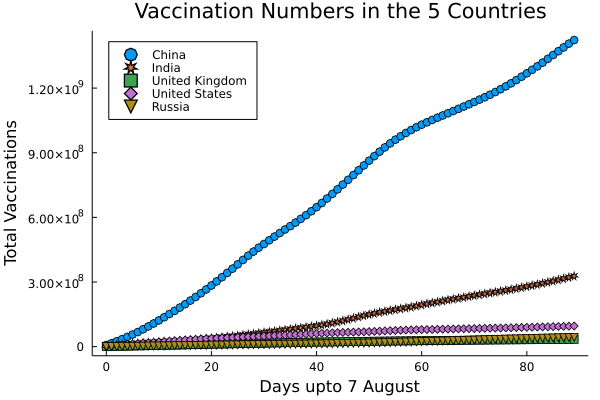

In [9]:
plot(vac[:,1], total_vac,   # here are the data to be plotted, below are the attributes
marker = ([:octagon :star7 :square :diamond :dtriangle], 4),
label  = ["China" "India" "United Kingdom" "United States" "Russia"],
title       = "Vaccination Numbers in the 5 Countries", 
xlabel    = "Days upto 7 August",
ylabel    = "Total Vaccinations",   
line   = (:scatter),
legend=:topleft,
grid        = false)

## Above is a Plot of Absolute Vaccination Numbers in the 5 Countries

#### -> The above plot shows that China is easily the leader in number of Vaccine doses
####      given in last 90 days. China leads by a huge margin from the second placed India
####     and the third placed United States. 
####     This is also in accordance with the fact that China and India are the most populous
####     countries in the world and the vaccination pace should keep up to vaccinate entire population
####     within a reasonable time to prevent a fresh wave/ outbreak of the pandemic.

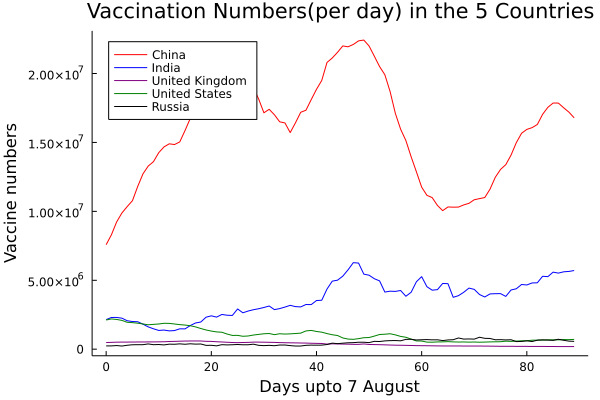

In [10]:
plot(vac[:,1], vac_int,   # here are the data to be plotted, below are the attributes
label  = ["China" "India" "United Kingdom" "United States" "Russia"],
title       = "Vaccination Numbers(per day) in the 5 Countries", 
xlabel    = "Days upto 7 August",
ylabel    = "Vaccine numbers",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:path, ["red" "blue" "purple" "green" "black"]),
legend=:topleft,
grid        = false)

## The Plot above is Of Daily Vaccination Numbers in the 5 Countries

#### -> The Daily Vaccine Doses administered shows that China leads
####      by a large margin in the numbers. India and US are second and 
####      third respectively having numbers in the millions. Despite the
####      multiple fluctuations in the daily numbers, the 5 countries have
####      been keeping up the pace quite well.

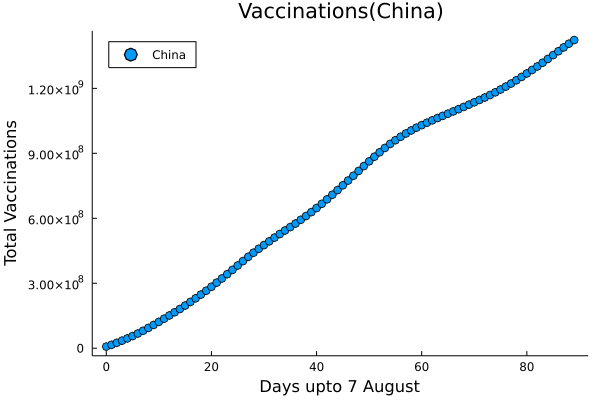

In [11]:
plot(vac[:,1], total_vac[:,1],   # here are the data to be plotted, below are the attributes
marker = (:octagon, 4),
label  = "China",
title       = "Vaccinations(China)", 
xlabel    = "Days upto 7 August",
ylabel    = "Total Vaccinations",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:scatter),
legend=:topleft,
grid        = false)

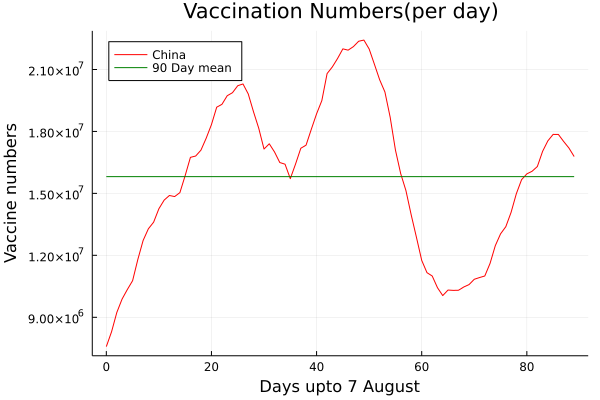

In [28]:
plot(vac[:,1], vac_int[:,1],   # here are the data to be plotted, below are the attributes
label  = "China",
title       = "Vaccination Numbers(per day)", 
xlabel    = "Days upto 7 August",
ylabel    = "Vaccine numbers",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:path, "red"),
legend=:topleft,
grid        = true)

x1=vac[:,1]
y1=(ones(Int,90,1)).*mn[1,1]

plot!(x1,y1,
label= ("90 Day mean"),
line= (:path, "green"))

## The Plot above shows the Absolute vaccination numbers and the
## Daily Vaccine doses administered in China in the last 90 Days

#### -> China has kept up a steady and fast vaccination pace and 
####     has administered a staggering 1.42 Billion+ vaccine doses 
####     in the last 90 days.
#### -> We can observe that China rapidly increased the daily numbers
####      from Day 0 and achieved a peak at around Day 25-27. The numbers
####      declined for a bit and picked up again just before Day 40.
#### -> The numbers started to dwindle around Day 52-55 and fell
####      majorly upto Day 72-75 from where it started rising again.
#### -> China has a total Population of around 1.4 Billion and has 
####     administered enough doses in last 90 days to doubly vaccinate
####     about 50% of the population.
#### -> The mean vaccine doses per day has been around 15.8 Million

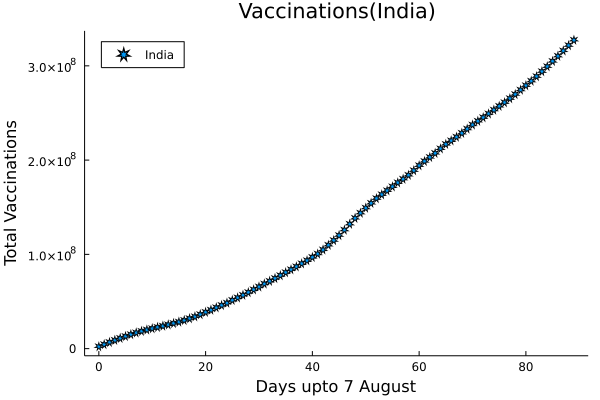

In [27]:
plot(vac[:,1], total_vac[:,2],   # here are the data to be plotted, below are the attributes
marker = (:star7, 4),
label  = "India",
title       = "Vaccinations(India)", 
xlabel    = "Days upto 7 August",
ylabel    = "Total Vaccinations",   
line   = (:scatter),
legend=:topleft,
grid        = false)

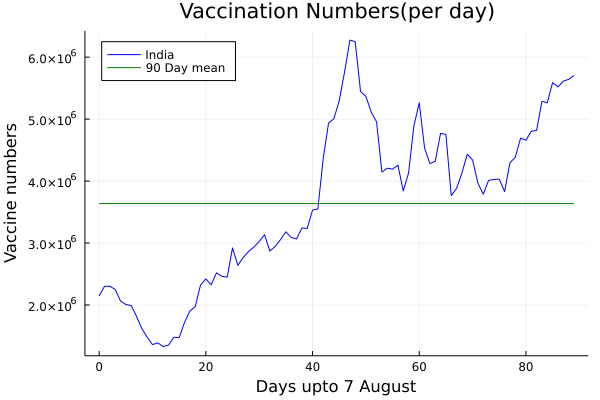

In [29]:
plot(vac[:,1], vac_int[:,2],   # here are the data to be plotted, below are the attributes
label  = "India",
title       = "Vaccination Numbers(per day)", 
xlabel    = "Days upto 7 August",
ylabel    = "Vaccine numbers",   
line   = (:path, "blue"),
legend=:topleft,
grid        = true)

x2=vac[:,1]
y2=(ones(Int,90,1)).*mn[1,2]

plot!(x2,y2,
label= ("90 Day mean"),
line= (:path, "green"))

## The Plot above shows the Absolute vaccination numbers and the 
## Daily Vaccine doses administered in India in the last 90 Days

#### -> India has rapidly increased the pace of vaccinations after the 40-
####     day mark has completed 327 Million + vaccine doses in the 90 days.
#### -> It is observable that India the vaccine doses per day has fluctuated
####      quite a bit after the 40-day mark but the numbers have not gone down
####      below the mean.
#### -> India has a population of about 1.39 Billion and has administered 
####     enough doses in last 90 days to doubly vaccinate about 11.8% of
####     the population.
#### -> The mean vaccine doses per day has been around 3.64 Million.

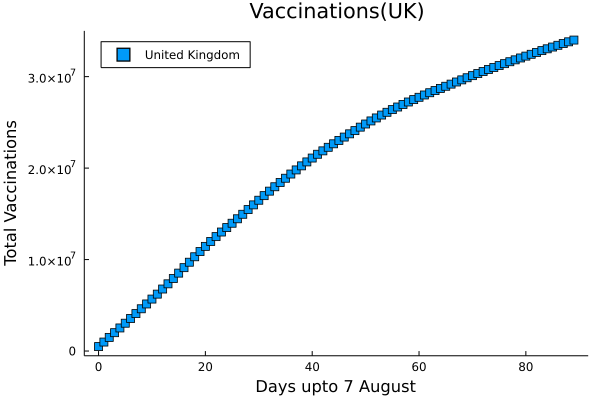

In [30]:
plot(vac[:,1], total_vac[:,3],   # here are the data to be plotted, below are the attributes
marker = (:square, 4),
label  = "United Kingdom",
title       = "Vaccinations(UK)", 
xlabel    = "Days upto 7 August",
ylabel    = "Total Vaccinations",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:scatter),
legend=:topleft,
grid        = false)

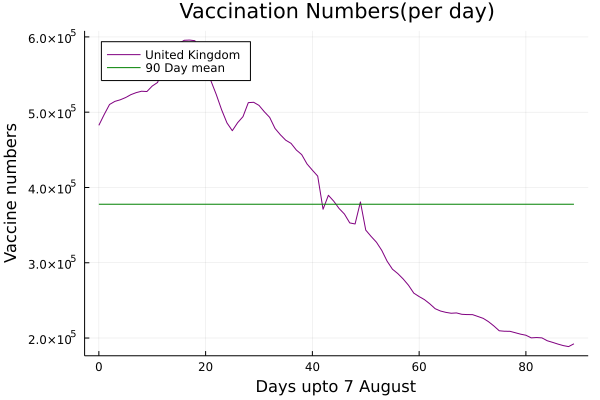

In [31]:
plot(vac[:,1], vac_int[:,3],   # here are the data to be plotted, below are the attributes
label  = "United Kingdom",
title       = "Vaccination Numbers(per day)", 
xlabel    = "Days upto 7 August",
ylabel    = "Vaccine numbers",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:path, "purple"),
legend=:topleft,
grid        = true)

x3=vac[:,1]
y3=(ones(Int,90,1)).*mn[1,3]

plot!(x3,y3,
label= ("90 Day mean"),
line= (:path, "green"))

## The Plot above shows the Absolute vaccination numbers and the
## Daily Vaccine doses administered in UK in the last 90 Days

#### -> The Vaccination pace of UK has steadily decreased over the
####     last 90 days and they have administered over 33.9 Million vaccine
####     doses during this period.
#### ->It is observable that the numbers have gone down steadily after 
####     Day 27-30.
#### -> UK has a population of around 68.27 Million which means they 
####     have done enough vaccinations to doubly vaccinate 24.9% of the
####     population in last 90 days.
#### -> The mean vaccine doses per day has been around 378,000.

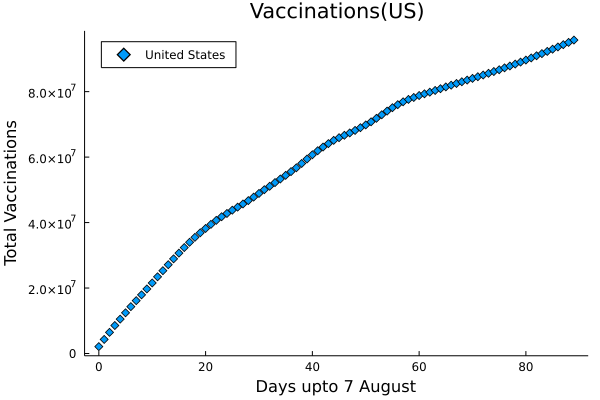

In [33]:
plot(vac[:,1], total_vac[:,4],   # here are the data to be plotted, below are the attributes
marker = (:diamond, 4),
label  = "United States",
title       = "Vaccinations(US)", 
xlabel    = "Days upto 7 August",
ylabel    = "Total Vaccinations",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:scatter),
legend=:topleft,
grid        = false)

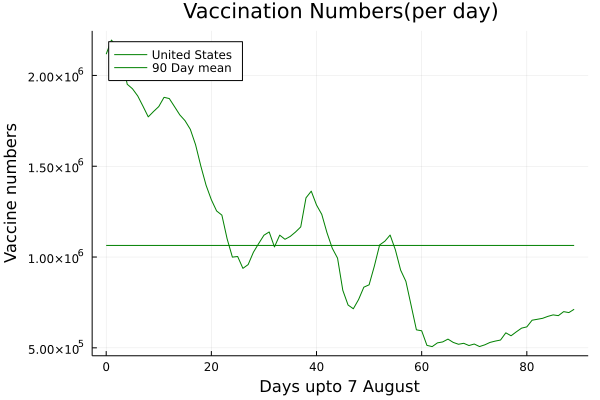

In [34]:
plot(vac[:,1], vac_int[:,4],   # here are the data to be plotted, below are the attributes
label  = "United States",
title       = "Vaccination Numbers(per day)", 
xlabel    = "Days upto 7 August",
ylabel    = "Vaccine numbers",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:path, "green"),
legend=:topleft,
grid        = true)

x4=vac[:,1]
y4=(ones(Int,90,1)).*mn[1,4]

plot!(x4,y4,
label= ("90 Day mean"),
line= (:path, "green"))

## The Plot above shows the Absolute vaccination numbers and the
## Daily Vaccine doses administered in the US in the last 90 Days

#### -> Despite the declining trends, the US has administered 
####     around 95.75 Million doses of vaccine in last 90 days.
#### -> There have been occasional ascents in the rates but
####      the general trend has been descent. The steady decline
####      is observable from the plot
#### -> The US has a population of around 333 Million and they
####      have done enough vaccinations to doubly vaccinate 
####      about 14.4% of the population.
#### -> The mean vaccine doses per day has been around 1.03 Million.

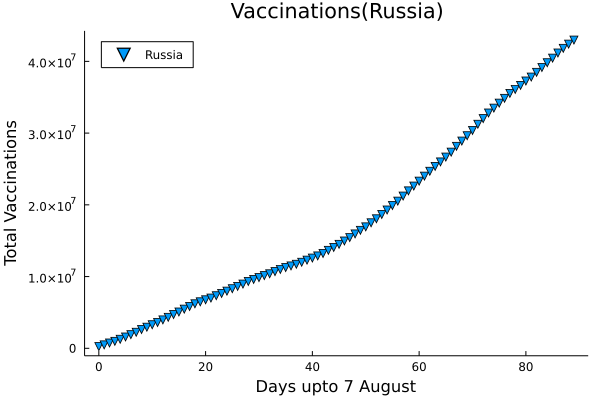

In [35]:
plot(vac[:,1], total_vac[:,5],   # here are the data to be plotted, below are the attributes
marker = (:dtriangle, 4),
label  = "Russia",
title       = "Vaccinations(Russia)", 
xlabel    = "Days upto 7 August",
ylabel    = "Total Vaccinations",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:scatter),
legend=:topleft,
grid        = false)

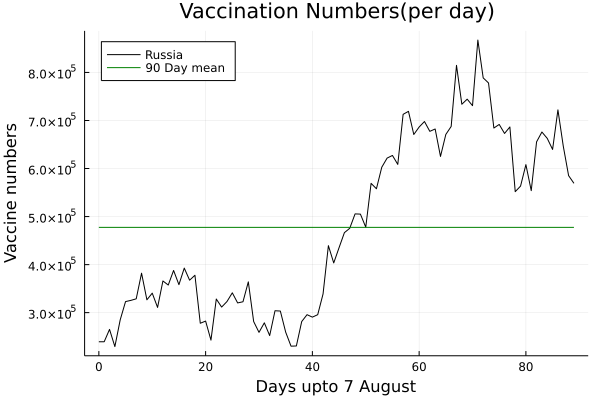

In [36]:
plot(vac[:,1], vac_int[:,5],   # here are the data to be plotted, below are the attributes
label  = "Russia",
title       = "Vaccination Numbers(per day)", 
xlabel    = "Days upto 7 August",
ylabel    = "Vaccine numbers",   # line attributes likewise put together as one unit by the use of parantheses
line   = (:path, "black"),
legend=:topleft,
grid        = true)

x5=vac[:,1]
y5=(ones(Int,90,1)).*mn[1,5]

plot!(x5,y5,
label= ("90 Day mean"),
line= (:path, "green"))

## The Plot above shows the Absolute vaccination numbers and the
## Daily Vaccine doses administered in Russia in the last 90 Days

#### -> The Vaccination rate in Russia has risen up well
####     in the last 90 days and they have administered 
####     42.97 Million doses of vaccine
#### -> It is observable from the plot that the daily vaccine 
####      numbers have gone up significantly in this phase
####      with multiple small ups and downs in the middle.
#### -> The Population of Russia is 146 Million and the number
####      of doses given in last 90 days is sufficient to doubly
####      vaccinate 14.72% of the population.
#### -> The mean vaccine doses per day has been around 477,000.